# Same Linear Regression problem using dataset and dataloader

In [2]:
# Imports
import pandas as pd
import torch
import numpy as np
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import seaborn as sns

# read csv
data = pd.read_csv('cars.csv')
data.head(2)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [5]:
# Independent variable procesisng
X_list = data.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)

# Dependent variable procesisng
y_list = data.mpg.values
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
Y = torch.from_numpy(y_np)


In [6]:
from mpg_dataset import MPGDataset

dataset = MPGDataset(X_np, y_np)
dataloader = DataLoader(dataset=dataset, batch_size=2)

In [7]:
# model initialization
from model import MPGPredictor

input_size = 1
output_size = 1

MPG_Predictor = MPGPredictor(input_size, output_size)

In [12]:
# loss function
loss_fucntion = nn.MSELoss()

# Hyper parameters
LR = 0.02
EPOCHS = 1000

# Optimizer
optimizer = torch.optim.SGD(MPG_Predictor.parameters(), lr=LR)

# Training loop
for i in range(EPOCHS):
    for index, (x, y) in enumerate(dataloader):

        # Optimizer grad to zero
        optimizer.zero_grad()
    
        # Forward pass
        y_prediction = MPG_Predictor(data[0])

        # Compute loss
        loss = loss_fucntion(y_prediction, y)

        # Calculate gredients
        loss.backward()

        # optimize
        optimizer.step()

    if i % 100 == 0:
        print('Epochs:', i)
        print('loss', loss)
        print('--------------------------')





Epochs: 0
loss tensor(36.1277, grad_fn=<MseLossBackward0>)
--------------------------
Epochs: 100
loss tensor(19.8775, grad_fn=<MseLossBackward0>)
--------------------------
Epochs: 200
loss tensor(15.4171, grad_fn=<MseLossBackward0>)
--------------------------
Epochs: 300
loss tensor(13.9595, grad_fn=<MseLossBackward0>)
--------------------------
Epochs: 400
loss tensor(13.4240, grad_fn=<MseLossBackward0>)
--------------------------
Epochs: 500
loss tensor(13.2147, grad_fn=<MseLossBackward0>)
--------------------------
Epochs: 600
loss tensor(13.1306, grad_fn=<MseLossBackward0>)
--------------------------
Epochs: 700
loss tensor(13.0963, grad_fn=<MseLossBackward0>)
--------------------------
Epochs: 800
loss tensor(13.0823, grad_fn=<MseLossBackward0>)
--------------------------
Epochs: 900
loss tensor(13.0766, grad_fn=<MseLossBackward0>)
--------------------------


<Axes: >

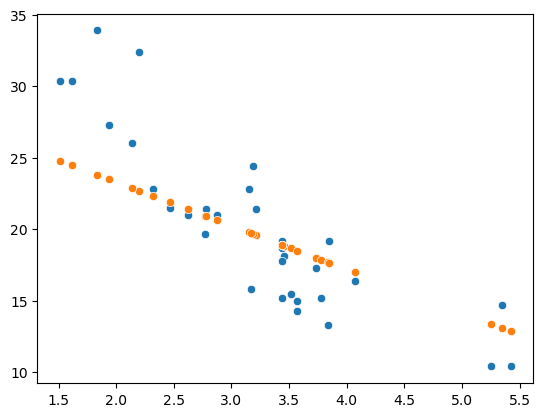

In [13]:
# Evaluation

y_prediction = MPG_Predictor(X).data.numpy().reshape(-1) # removing batch dimension

# plots
sns.scatterplot(x=X_list, y=y_list) # real target values against inputs
sns.scatterplot(x=X_list, y=y_prediction) # predictions againsts inputs